In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Zomato-data-.csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [22]:
def handle_rate(val):
    val = str(val).split("/")
    val = val[0]
    return float(val)

df["rate"] = df["rate"].apply(handle_rate)
print(df)
print(df.info())

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

In [23]:
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [24]:
# check missing or null vals
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Text(0.5, 0, 'Type Of Restaurant')

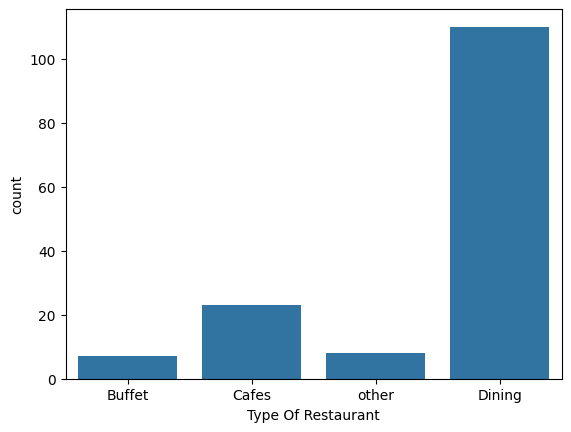

In [25]:
# Visaulize restaurant types
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Type Of Restaurant")

In [26]:
# votes by restaurant types
gp_df = df.groupby("listed_in(type)")['votes'].sum()
print(gp_df)
vt_df = pd.DataFrame({'votes':gp_df})
print(vt_df)

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64
                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Text(0, 0.5, 'Votes')

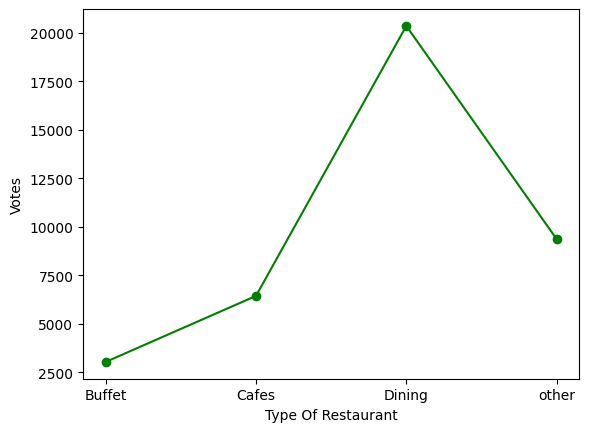

In [27]:
plt.plot(vt_df,c ='green',marker='o')
plt.xlabel("Type Of Restaurant")
plt.ylabel("Votes")

In [28]:
# most voted restaurant
mx_votes = df['votes'].max()
rt_max_votes = df.loc[df['votes']==mx_votes,'name']
print("Restaurants with max votes : ")
print(rt_max_votes)

Restaurants with max votes : 
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

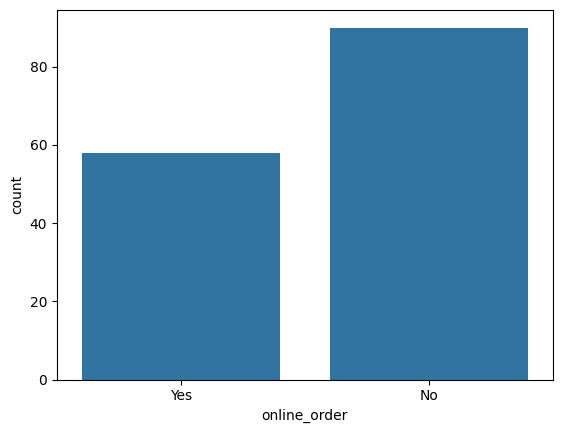

In [29]:
# plot for count of restaurant(s) with online orders
sns.countplot(x=df['online_order'])

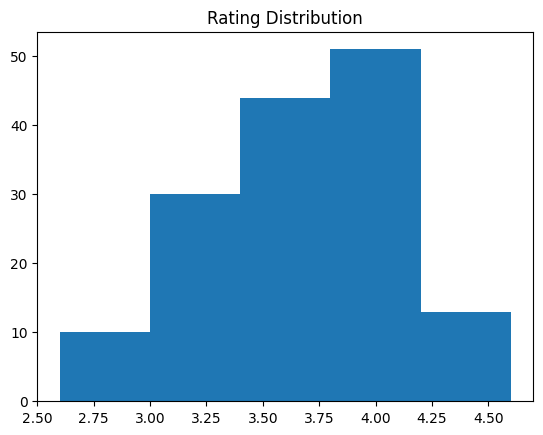

In [30]:
# Analyze ratings
plt.hist(df['rate'],bins= 5)
plt.title("Rating Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

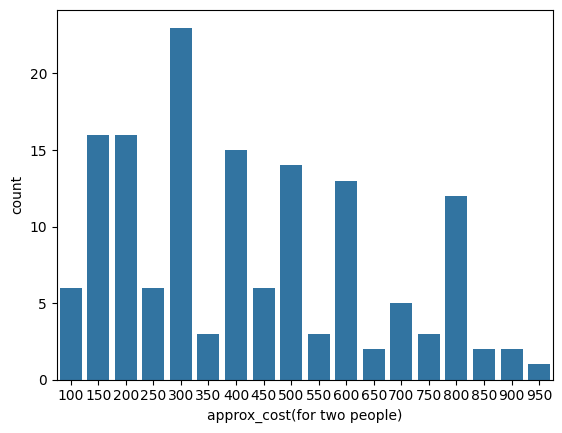

In [31]:
#approx cost for couples
cp_ds = df['approx_cost(for two people)']
sns.countplot(x=cp_ds)

<Axes: xlabel='online_order', ylabel='rate'>

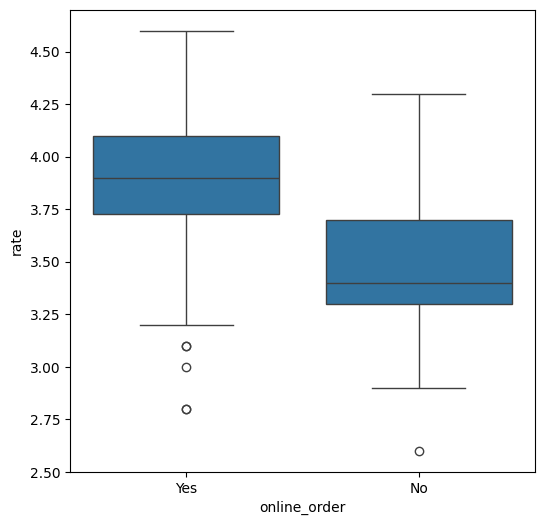

In [32]:
# rating comparison online vs offline orders
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order',y='rate',data = df)

In [33]:
# Ordermode Preferences By Restaurant Types
pvt_tbl  = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
print(pvt_tbl)

online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


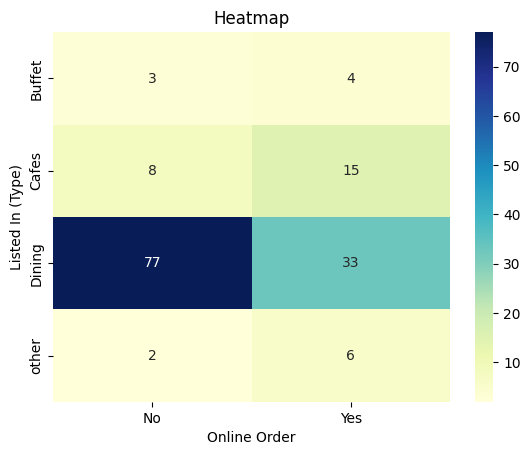

In [35]:
sns.heatmap(pvt_tbl,annot =True,cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()